In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ssl
from urllib.request import urlopen
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

ssl._create_default_https_context = ssl._create_unverified_context

In [63]:

# load data
df = pd.read_csv('shopping_behavior_updated.csv')

# Geo Json data
with urlopen('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json') as response:
    us_states = json.load(response)
    
#help func
def calculate_centroid(coords):
    x = [p[0] for p in coords]
    y = [p[1] for p in coords]
    return sum(x) / len(coords), sum(y) / len(coords)

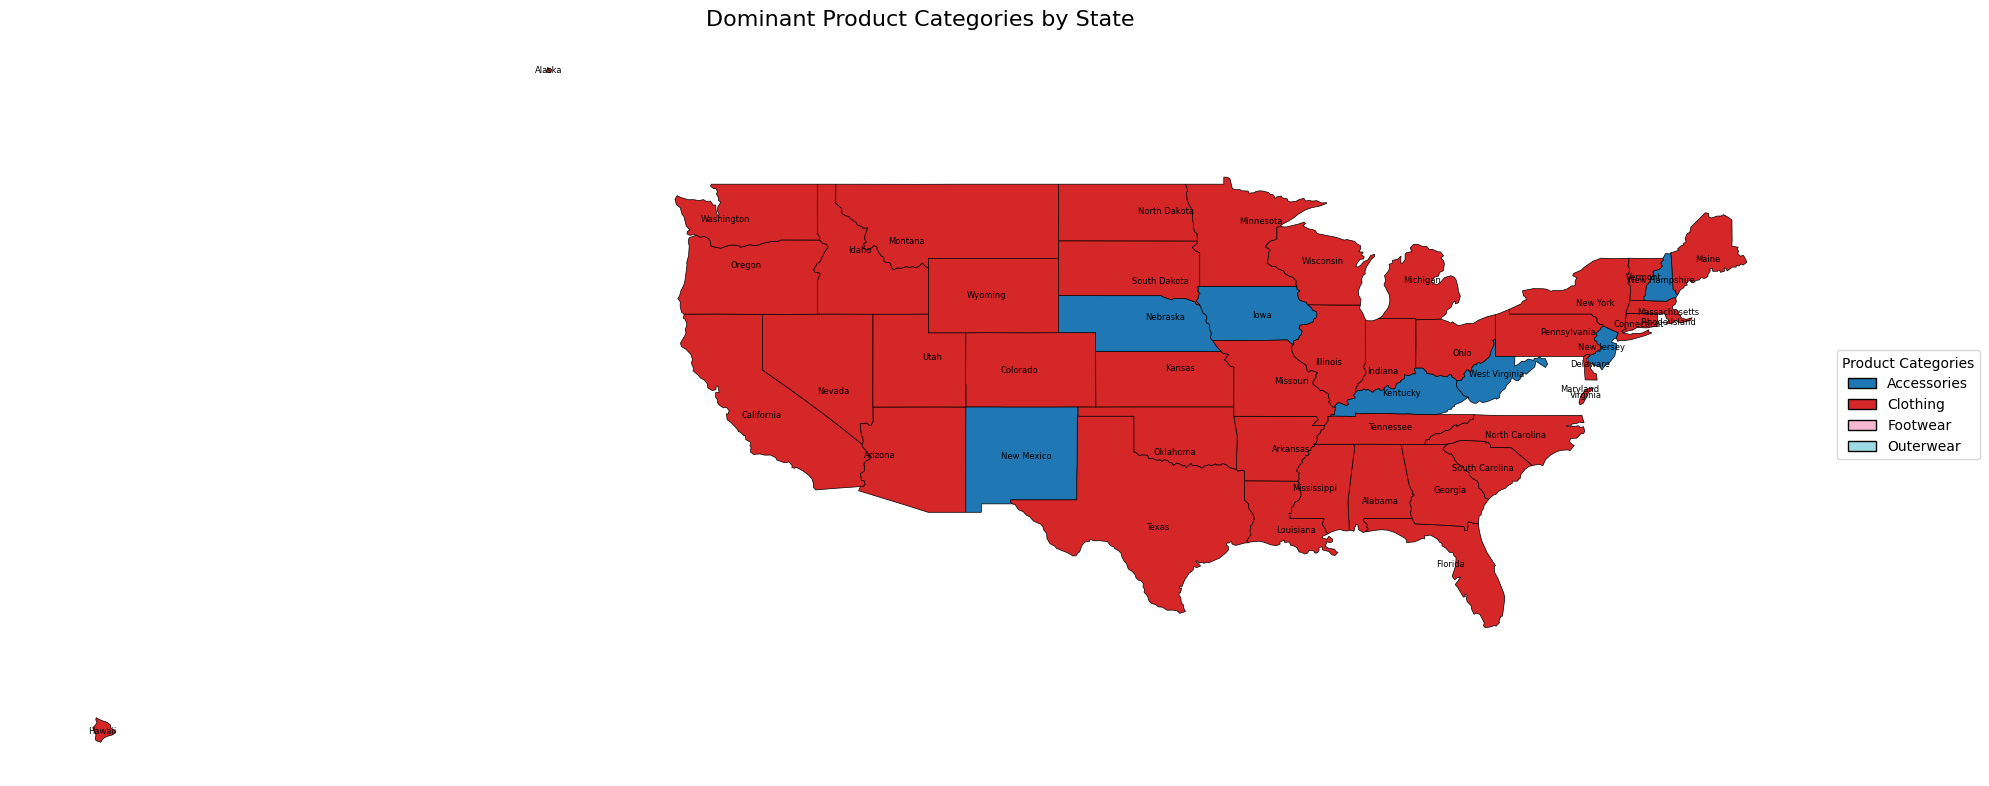

In [64]:
# category-map
state_category_counts = df.groupby(['Location', 'Category']).size().unstack(fill_value=0)
dominant_categories = state_category_counts.idxmax(axis=1)

# prepare and set based for fig
fig, ax = plt.subplots(figsize=(20, 12))
unique_categories = sorted(df['Category'].unique())

colors = plt.cm.tab20(np.linspace(0, 1, len(unique_categories)))
color_dict = dict(zip(unique_categories, colors))

patches = []
colors = []

for state in us_states['features']:
    state_name = state['properties']['name']
    
    if state['geometry']['type'] == 'Polygon':
        coords = state['geometry']['coordinates'][0]
    else:
        coords = state['geometry']['coordinates'][0][0]
    
    patch = Polygon(coords, closed=True)
    patches.append(patch)
    
    category = dominant_categories.get(state_name, None)
    color = color_dict.get(category, [0.8, 0.8, 0.8, 1])  
    colors.append(color)

    centroid = calculate_centroid(coords)
    ax.annotate(state_name, xy=centroid, ha='center', va='center', fontsize=6)
    

pc = PatchCollection(patches, facecolors=colors, edgecolor='black', linewidth=0.5)
ax.add_collection(pc)

ax.axis("off")
ax.set_aspect('equal')

#plot 
plt.title('Dominant Product Categories by State', fontsize=16)

legend_elements = [plt.Rectangle((0,0), 1, 1, facecolor=color_dict[cat], edgecolor='black')
                  for cat in unique_categories]
ax.legend(legend_elements, 
         unique_categories,
         loc='center left', 
         bbox_to_anchor=(1, 0.5),
         title='Product Categories')
ax.autoscale_view()
plt.tight_layout()
plt.show()


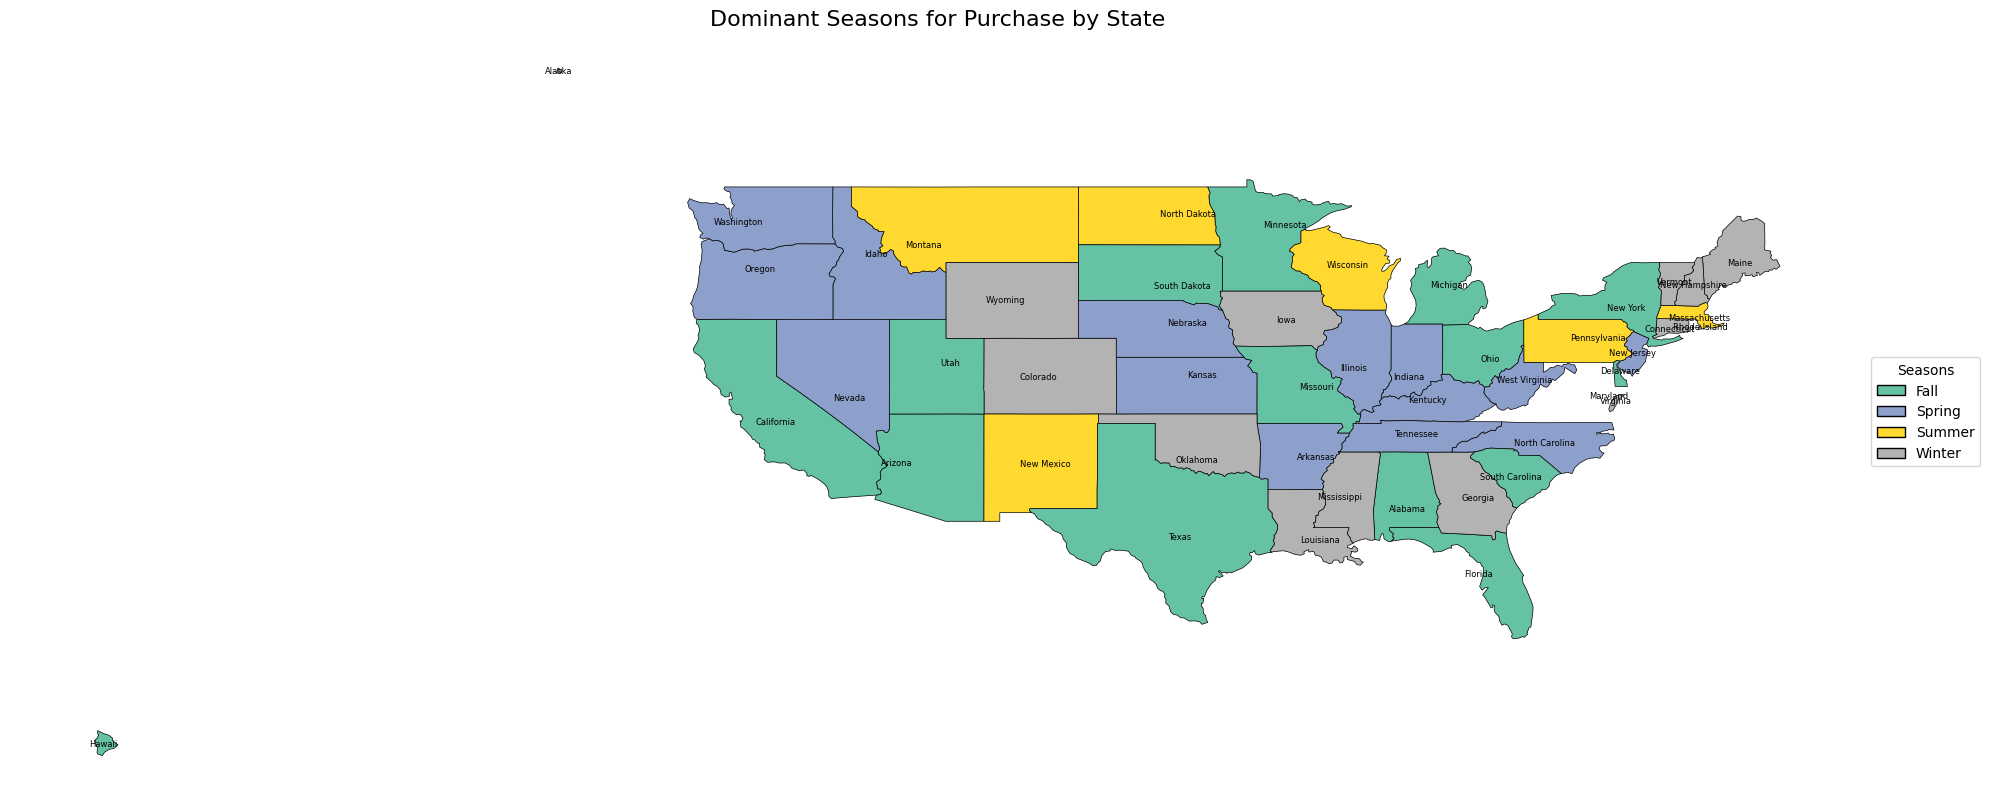

In [71]:
# season location map
state_season_counts = df.groupby(['Location', 'Season']).size().unstack(fill_value=0)
dominant_seasons = state_season_counts.idxmax(axis=1)

fig2, ax2 = plt.subplots(figsize=(20, 12))

# prepare data
seasons = sorted(df['Season'].unique())
season_colors = plt.cm.Set2(np.linspace(0, 1, len(seasons)))
season_color_dict = dict(zip(seasons, season_colors))

season_patches = []
season_colors = []

for state in us_states['features']:
    state_name = state['properties']['name']
    
    if state['geometry']['type'] == 'Polygon':
        coords = state['geometry']['coordinates'][0]
    else:
        coords = state['geometry']['coordinates'][0][0]
    
    patch = Polygon(coords, closed=True)
    season_patches.append(patch)
    
    season = dominant_seasons.get(state_name, None)
    color = season_color_dict.get(season, [0.8, 0.8, 0.8, 1])
    season_colors.append(color)
    
    centroid = calculate_centroid(coords)
    ax2.annotate(state_name, xy=centroid, ha='center', va='center', fontsize=6)
    


pc2 = PatchCollection(season_patches, facecolors=season_colors, edgecolor='black', linewidth=0.5)
ax2.add_collection(pc2)

ax2.axis('off')
ax2.set_aspect('equal')

# plot setting and plot
plt.title('Dominant Seasons for Purchase by State', fontsize=16)

season_legend = [plt.Rectangle((0,0), 1, 1, facecolor=season_color_dict[season], edgecolor='black')
                for season in seasons]
ax2.legend(season_legend, 
          seasons,
          loc='center left', 
          bbox_to_anchor=(1, 0.5),
          title='Seasons')
ax2.autoscale_view()
plt.tight_layout()
plt.show()

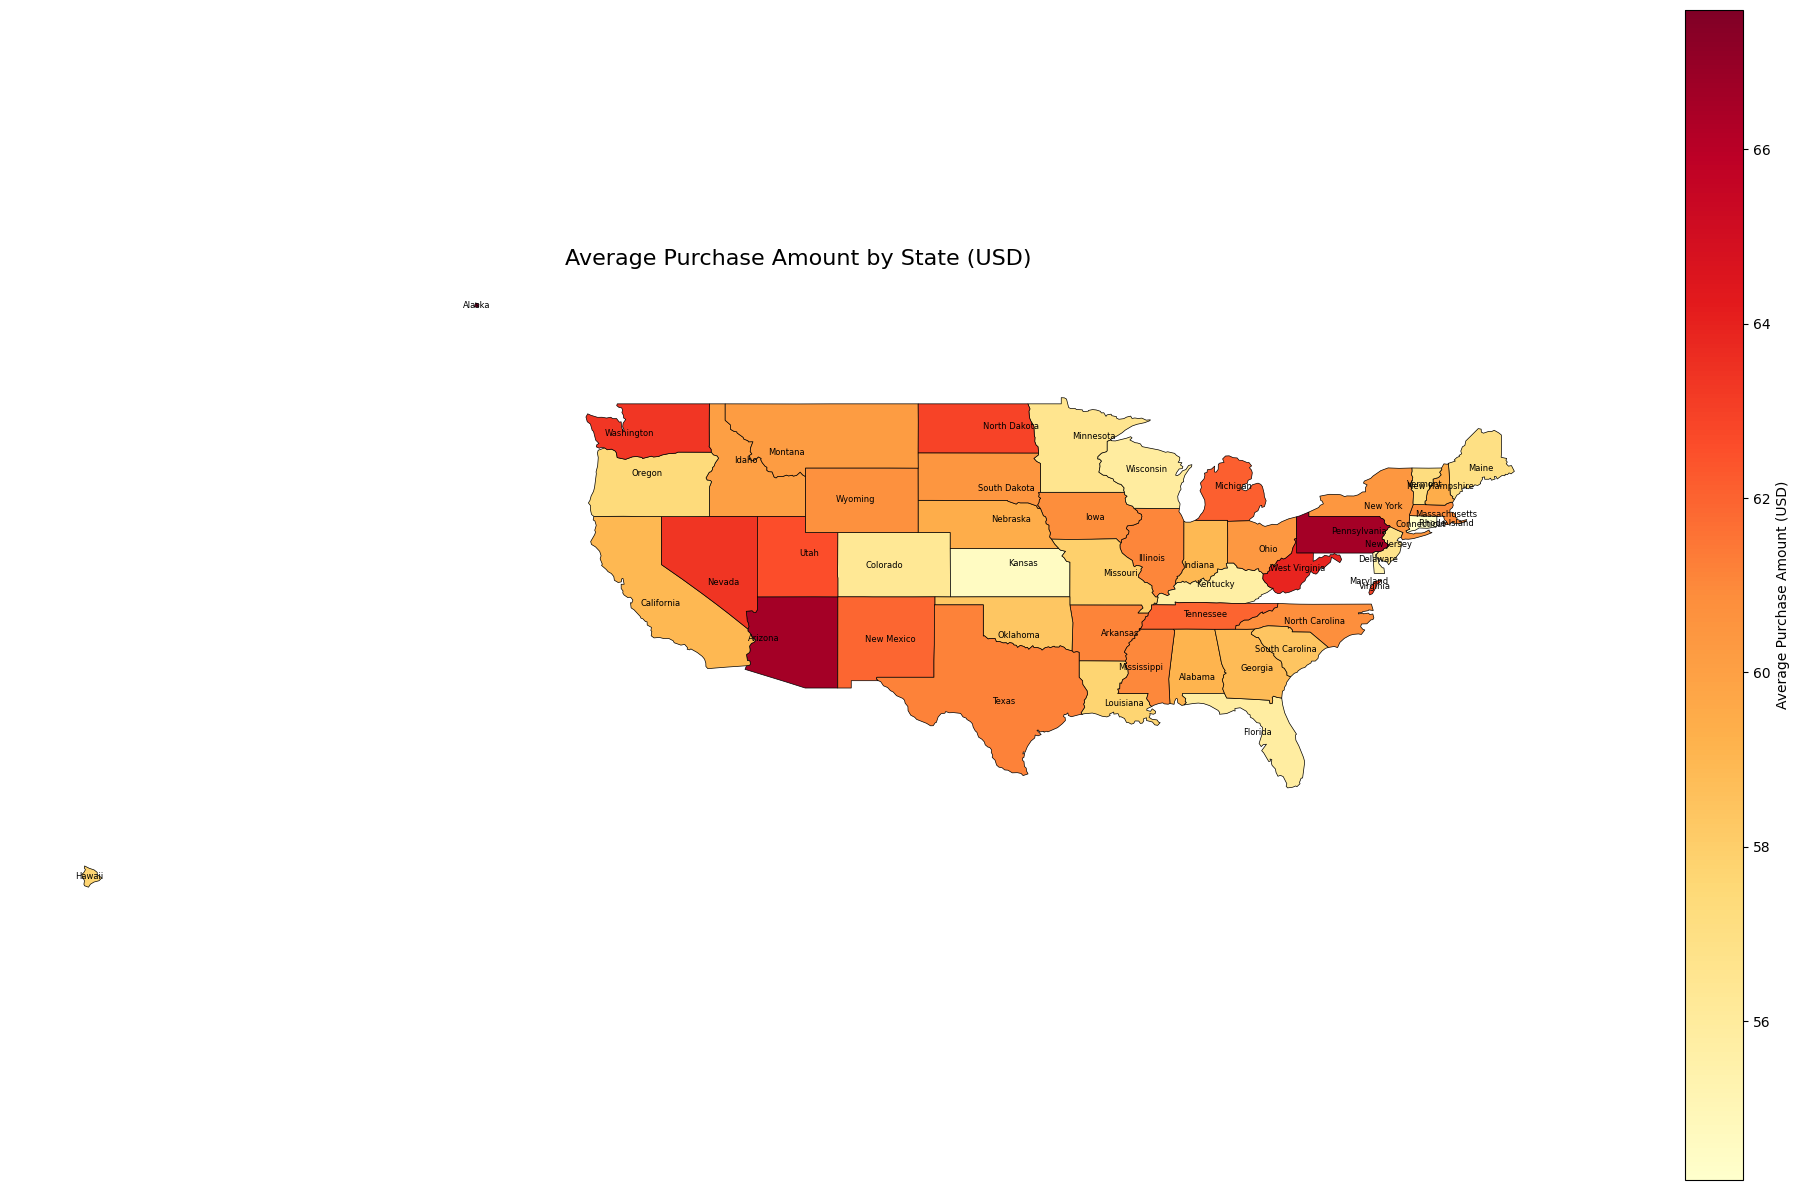

In [75]:
state_avg_purchase = df.groupby(['Location'])['Purchase Amount (USD)'].mean()

# prepare and set based for fig
fig, ax3 = plt.subplots(figsize=(20, 12))
norm = plt.Normalize(state_avg_purchase.min(), state_avg_purchase.max())
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm) 
patches = []
colors = []

for state in us_states['features']:
    state_name = state['properties']['name']
    
    if state['geometry']['type'] == 'Polygon':
        coords = state['geometry']['coordinates'][0]
    else:
        coords = state['geometry']['coordinates'][0][0]
    
    patch = Polygon(coords, closed=True)
    patches.append(patch)
    
    avg_purchase = state_avg_purchase.get(state_name, 0)
    color = sm.cmap(norm(avg_purchase)) 
    colors.append(color)

    centroid = calculate_centroid(coords)
    ax3.annotate(state_name, xy=centroid, ha='center', va='center', fontsize=6)

pc = PatchCollection(patches, facecolors=colors, edgecolor='black', linewidth=0.5)
ax3.add_collection(pc)

ax3.axis("off")
ax3.set_aspect("equal")

plt.title('Average Purchase Amount by State (USD)', fontsize=16)
cbar = plt.colorbar(sm, ax=ax3)  
cbar.set_label('Average Purchase Amount (USD)', fontsize=10)

ax3.autoscale_view()
plt.tight_layout()
plt.show()